In [36]:

## Imports
import keras
import matplotlib
import sklearn

import numpy as np
import pandas as pd
import seaborn as sns

from keras.datasets import cifar10
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:

# Load the data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [3]:

# Visualize the data
print("Training data shape: {}", x_train.shape)
print("Training labels shape: {}", y_train.shape)
print("Testing data shape: {}", x_test.shape)
print("Testing labels shape: {}", y_test.shape)


Training data shape: {} (50000, 32, 32, 3)
Training labels shape: {} (50000, 1)
Testing data shape: {} (10000, 32, 32, 3)
Testing labels shape: {} (10000, 1)


In [4]:

# Find and display labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of classes:', nClasses)
print('Output classes:', classes)


Total number of classes: 10
Output classes: [0 1 2 3 4 5 6 7 8 9]


In [5]:

# Create a dictionary to correspond class names with categorical class labels
labels = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}


Text(0.5, 1.0, '(Label: cat)')

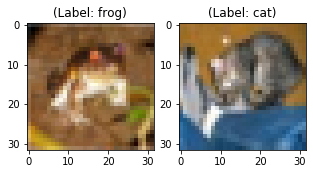

In [6]:

# Plot the data
plt.figure(figsize = [5, 5])

# Display the first image from training data
plt.subplot(121)
image = np.reshape(x_train[0], (32, 32, 3))
plt.imshow(image)
plt.title('(Label: ' + str(labels[y_train[0][0]]) + ')')

# Display the first image from testing data
plt.subplot(122)
image = np.reshape(x_test[0], (32, 32, 3))
plt.imshow(image)
plt.title('(Label: ' + str(labels[y_test[0][0]]) + ')')


In [7]:

# Normalize the data by dividing by the pixel RGB range
x_train = x_train / 255.0


In [8]:

# Reshape dimensions from 3 --> 1 (flatten)
x_train_flat = x_train.reshape(-1, 3072)


In [9]:

# Create labels for each pixel
feature_cols = ['pixel' + str(i) for i in range(x_train_flat.shape[1])]


In [12]:

# Create a DataFrame with the flattened data and generated pixel features
cifar_df = pd.DataFrame(x_train_flat, columns = feature_cols)


In [13]:

# Examine the new DataFrame
cifar_df.head()


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3062,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,...,0.407843,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,...,0.533333,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.309804,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313725,0.337255,0.329412
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,...,0.149020,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,...,0.305882,0.294118,0.309804,0.321569,0.278431,0.294118,0.305882,0.286275,0.301961,0.313725


In [15]:

# Append the ground-truth labels (see $labels) to each image
cifar_df['label'] = y_train


In [16]:

# Examine the current size of the DataFrame
print('cifar_df shape:', cifar_df.shape)


df_cifar shape: (50000, 3073)


In [23]:

# Apply PCA
pca_cifar = PCA(n_components = 3)


[[ -6.40101763   2.72903865   1.50171198]
 [  0.82978338  -0.94994346   6.0037482 ]
 [  7.73019978 -11.522102    -2.75361019]
 ...
 [  0.70734659 -11.34252125  -0.39391056]
 [ 11.36790901  -3.37597755   5.56618655]
 [  4.19279645  -1.18418879  -4.44596556]]


In [31]:

# Standardize the PCA results
principal_components = pca_cifar.fit_transform(cifar_df.iloc[:,:-1])


In [32]:

# Create a DataFrame with the 3 Principal Components as labels
principal_df = pd.DataFrame(data = principal_components,
                            columns = ['PC1', 'PC2', 'PC3'])


In [33]:

# Append the ground truth to the new DataFrame
principal_df['y'] = y_train


In [34]:

# Examine the DataFrame of Principal Components (n = 3)
principal_df.head()


,PC1,PC2,PC3,y
0,-6.401018,2.729039,1.501708,6
1,0.829783,-0.949943,6.003746,9
2,7.730200,-11.522102,-2.753620,9
3,-10.347817,0.010738,1.101016,4
4,-2.625651,-4.969240,1.034598,1


In [35]:

# Examine the variation each PC holds
print('Variation (in percentage) per principal component: {}'.format(pca_cifar.explained_variance_ratio_))


Variation (in percentage) per principal component: [0.2907663  0.11253144 0.06694414]


In [ ]:

# Scatterplot the data
plt.figure(figsize = (15, 10))
sns.scatterplot(
    x = 'PC1', y = 'PC2'
)